In [18]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import pytz
import os
from shapely import wkt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import xarray as xr

In [92]:
### user settings
time= 's202203310936000_e202203311118000'
dir_path_nccf = '/Users/sophiahu/Downloads/NCCF/'# "nc/n20_atms/2021-08-29/"
dir_path_star = '/Users/sophiahu/Downloads/STAR/'
img_vars= ['RR','TSkin','TPW','Emis']
snd_vars=['PTemp_500','PTemp_850']


In [86]:
filelist = os.listdir(dir_path_nccf)
files_nccf= [fullname for fullname in filelist if time in fullname]
nccf_img_file= [s for s in files_nccf if 'IMG' in s][0]
nccf_snd_file= [s for s in files_nccf if 'SND' in s][0]
nccf_img_file

'NPR-MIRS-IMG_v11r6_ma3_s202203310936000_e202203311118000_c202203311239430.nc'

In [85]:
filelist = os.listdir(dir_path_star)
files_star= [fullname for fullname in filelist if time in fullname]
star_img_file= [s for s in files_star if 'IMG' in s][0]
star_snd_file= [s for s in files_star if 'SND' in s][0]
star_img_file

'NPR-MIRS-IMG_v11r8_ma3_s202203310936000_e202203311118000_c202204010245080.nc'

In [87]:
ds_img_nccf = xr.open_dataset(dir_path_nccf + nccf_img_file)
ds_img_star = xr.open_dataset(dir_path_star + star_img_file)
ds_snd_nccf = xr.open_dataset(dir_path_nccf + nccf_snd_file)
ds_snd_star = xr.open_dataset(dir_path_star + star_snd_file)

In [91]:
ds_img_nccf

<xarray.Dataset>
Dimensions:              (Channel: 20, Scanline: 2274, Field_of_view: 90, Qc_dim: 4)
Coordinates:
    Freq                 (Channel) float32 ...
    Latitude             (Scanline, Field_of_view) float32 ...
    Longitude            (Scanline, Field_of_view) float32 ...
Dimensions without coordinates: Channel, Scanline, Field_of_view, Qc_dim
Data variables: (12/50)
    Polo                 (Channel) int16 ...
    ScanTime_year        (Scanline) float32 ...
    ScanTime_doy         (Scanline) timedelta64[ns] ...
    ScanTime_month       (Scanline) float32 ...
    ScanTime_dom         (Scanline) timedelta64[ns] ...
    ScanTime_hour        (Scanline) timedelta64[ns] ...
    ...                   ...
    WindSp               (Scanline, Field_of_view) float32 ...
    WindDir              (Scanline, Field_of_view) float32 ...
    WindU                (Scanline, Field_of_view) float32 ...
    WindV                (Scanline, Field_of_view) float32 ...
    Prob_SF              (Scanline, Field_of_view) float32 ...
    quality_information  |S1 ...
Attributes: (12/54)
    missing_value:                            -999
    notretrievedproduct_value:                -888
    noretrieval_value:                        -99
    cdf_version:                              4.0
    alg_version:                              110621298
    dap_version:                              v11r6
    ...                                       ...
    percentage_optimal_retrievals:            0.4570947
    percentage_suboptimal_retrievals:         0.5428858
    percentage_bad_retrievals:                1.954461e-05
    start_orbit_number:                       17622
    end_orbit_number:                         17623
    id:                                       29cc847af3e3_2022-03-31T12:40:0...

In [96]:
ds_snd_nccf['Player']

<xarray.DataArray 'Player' (P_Layer: 100)>
array([1.100000e-02, 2.700000e-02, 5.700000e-02, 1.070000e-01, 1.810000e-01,
       2.850000e-01, 4.250000e-01, 6.100000e-01, 8.450000e-01, 1.136000e+00,
       1.492000e+00, 1.920000e+00, 2.427000e+00, 3.020000e+00, 3.708000e+00,
       4.498000e+00, 5.399000e+00, 6.417000e+00, 7.561000e+00, 8.839000e+00,
       1.025800e+01, 1.182600e+01, 1.355200e+01, 1.544400e+01, 1.750800e+01,
       1.975300e+01, 2.218800e+01, 2.481800e+01, 2.765200e+01, 3.069700e+01,
       3.396300e+01, 3.745400e+01, 4.117800e+01, 4.514400e+01, 4.935800e+01,
       5.382700e+01, 5.855700e+01, 6.355700e+01, 6.883300e+01, 7.439000e+01,
       8.023600e+01, 8.637600e+01, 9.281700e+01, 9.956500e+01, 1.066270e+02,
       1.140070e+02, 1.217120e+02, 1.297460e+02, 1.381150e+02, 1.468260e+02,
       1.558810e+02, 1.652870e+02, 1.750480e+02, 1.851690e+02, 1.956550e+02,
       2.065080e+02, 2.177340e+02, 2.293370e+02, 2.413210e+02, 2.536890e+02,
       2.664440e+02, 2.795910e+02, 2.931310e+02, 3.070680e+02, 3.214060e+02,
       3.361460e+02, 3.512920e+02, 3.668450e+02, 3.828090e+02, 3.991840e+02,
       4.159720e+02, 4.331760e+02, 4.507970e+02, 4.688360e+02, 4.872960e+02,
       5.061750e+02, 5.254760e+02, 5.451990e+02, 5.653460e+02, 5.859160e+02,
       6.069090e+02, 6.283260e+02, 6.501660e+02, 6.724300e+02, 6.951160e+02,
       7.182250e+02, 7.417570e+02, 7.657090e+02, 7.900800e+02, 8.148710e+02,
       8.400790e+02, 8.657040e+02, 8.917430e+02, 9.181950e+02, 9.450570e+02,
       9.723290e+02, 1.000008e+03, 1.028090e+03, 1.056574e+03, 1.085458e+03],
      dtype=float32)
Coordinates:
    Player   (P_Layer) float32 0.011 0.027 0.057 ... 1.057e+03 1.085e+03
Dimensions without coordinates: P_Layer
Attributes:
    long_name:    Pressure for each layer in mb
    units:        millibars
    valid_range:  [1.100000e-02 1.085458e+03]

In [115]:
ds_img_nccf['RR']

<xarray.DataArray 'RR' (Scanline: 2274, Field_of_view: 90)>
array([[nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ...,  0.,  0., nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    Latitude   (Scanline, Field_of_view) float32 ...
    Longitude  (Scanline, Field_of_view) float32 ...
Dimensions without coordinates: Scanline, Field_of_view
Attributes:
    long_name:    Rain Rate (mm/hr)
    units:        mm/hr
    valid_range:  [   0 1000]

In [98]:
var_name= 'PTemp_500'
if var_name in img_vars: 
    y= ds_img_nccf[var_name]
    x= ds_img_star[var_name]
    if var_name == 'Emis':
        y= y[:,:,2]
        x= x[:,:,2]
else: 
    if var_name == 'PTemp_500':
        y= ds_snd_nccf['PTemp'][:,:,75]
        x= ds_snd_star['PTemp'][:,:,75]
    if var_name == 'PTemp_850':
        y= ds_snd_nccf['PTemp'][:,:,90]
        x= ds_snd_star['PTemp'][:,:,90]
x

<xarray.DataArray 'PTemp' (Scanline: 2274, Field_of_view: 90)>
[204660 values with dtype=float32]
Coordinates:
    Latitude   (Scanline, Field_of_view) float32 ...
    Longitude  (Scanline, Field_of_view) float32 ...
    Player     float32 ...
Dimensions without coordinates: Scanline, Field_of_view
Attributes:
    long_name:    Temperature profile in K
    units:        Kelvin
    valid_range:  [   0. 1000.]

In [29]:
!pip install mpl-scatter-density

     |████████████████████████████████| 655 kB 1.8 MB/s eta 0:00:01


In [49]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
    return x,y,z
    

In [59]:
def using_mpl_scatter_density(fig, x, y):
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

In [64]:
def scatter_with_gaussian_kde(x, y):
    x, y = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    return z

In [193]:
def plotvar (var_name):
    
    if var_name in img_vars: 
        y= ds_img_nccf[var_name]
        x= ds_img_star[var_name]
        if var_name == 'Emis':
            y= y[:,:,2]
            x= x[:,:,2]
    else: 
        if var_name == 'PTemp_500':
            y= ds_snd_nccf['PTemp'][:,:,75]
            x= ds_snd_star['PTemp'][:,:,75]
        if var_name == 'PTemp_850':
            y= ds_snd_nccf['PTemp'][:,:,90]
            x= ds_snd_star['PTemp'][:,:,90]
    fig=plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')


    #fig,ax= plt.subplots( projection='scatter_density')
    x_1D= x.stack(allpoints= ['Scanline','Field_of_view']).values#x.values #.flatten()
    y_1D= y.stack(allpoints= ['Scanline','Field_of_view']).values#y.values #.flatten()
    x_1D = np.nan_to_num(x_1D)
    y_1D = np.nan_to_num(y_1D)
    m,b= np.polyfit(x_1D,y_1D,1)
    plt.plot(x_1D,m*x_1D+b,c='Black',label= 'Best-fit')
    #add fitted regression equation to plot
    from scipy.stats import pearsonr
    corr,_ = pearsonr(x_1D,y_1D)
    from numpy import std
    plt.text(0.75,0.25,'Correlation = ' + '{:.2f}'.format(corr)+'\n'+ 'Y-intercept = ' + '{:.2f}'.format(b) + '\nSlope= {:.2f}'.format(m) + '\nPoints = {:.2f}'.format(len(x))+ '\nRMS = {:.2f}'.format(np.sqrt(np.mean((m*x_1D+b)**2)))+ '\nStd. Dev = {:.2f}'.format(std(m*x_1D+b)) ,transform=plt.gca().transAxes, size=8)
    #plt.text(20, 5, 'correlation = ' + '{:.2f}'.format(corr), size=14)
    plt.scatter(x,y, c='Blue', label='Data')
    line= mlines.Line2D([0,1],[0,1],color='red', label= '1:1 line')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    ax.set_xlabel('STAR')
    ax.set_ylabel('NCCF')
    ax.set_title(var_name)
    #using_mpl_scatter_density(fig, x.fillna(1000), y.fillna(1000))
    
    #z= scatter_with_gaussian_kde(x,y)
    #ax.scatter(x, y, c=z, s=100, edgecolor='')
    #a,b,c= density_scatter(x,y)
    #ax.scatter( a,b,c=c, **kwargs )
    #norm = Normalize(vmin = np.min(c), vmax = np.max(c))
    #cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    #cbar.ax.set_ylabel('Density')



    import mpl_scatter_density # adds projection='scatter_density'
    from matplotlib.colors import LinearSegmentedColormap

    # "Viridis-like" colormap with white background
    white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
        (0, '#ffffff'),
        (1e-20, '#440053'),
        (0.2, '#404388'),
        (0.4, '#2a788e'),
        (0.6, '#21a784'),
        (0.8, '#78d151'),
        (1, '#fde624'),
    ], N=256)



    plt.legend()
    plt.savefig(f'{var_name}_scatter.png', facecolor= 'white', transparent= False)
    plt.show()


In [123]:
x_1D.values



array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [ ]:
x_1D[np.logical_not(np.isnan(x_1D))

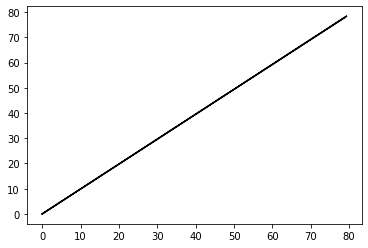

In [176]:
def linear_trend(x):
    pf = np.polyfit(x.time, x, 1)
    # need to return an xr.DataArray for groupby
    return xr.DataArray(pf[0])

var_name='RR'
if var_name in img_vars: 
    y= ds_img_nccf[var_name]
    x= ds_img_star[var_name]
    if var_name == 'Emis':
        y= y[:,:,2]
        x= x[:,:,2]
else: 
    if var_name == 'PTemp_500':
        y= ds_snd_nccf['PTemp'][:,:,75]
        x= ds_snd_star['PTemp'][:,:,75]
    if var_name == 'PTemp_850':
        y= ds_snd_nccf['PTemp'][:,:,90]
        x= ds_snd_star['PTemp'][:,:,90]
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')


#fig,ax= plt.subplots( projection='scatter_density')
x_1D= x.stack(allpoints= ['Scanline','Field_of_view']).values#x.values #.flatten()
y_1D= y.stack(allpoints= ['Scanline','Field_of_view']).values#y.values #.flatten()
x_1D = np.nan_to_num(x_1D)
y_1D = np.nan_to_num(y_1D)
# apply the function over allpoints to calculate the trend at each point
#trend = stacked.groupby('allpoints').apply(linear_trend)
# unstack back to lat lon coordinates
#trend_unstacked = trend.unstack('allpoints')
m,b= np.polyfit(x_1D,y_1D,1)
plt.plot(x_1D,m*x_1D+b,c='Black',label= 'Best-fit')

plt.show()

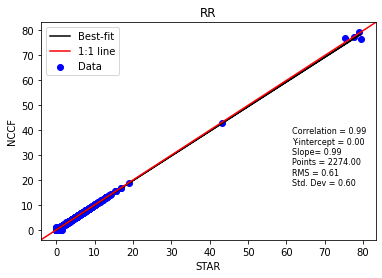

In [194]:
plotvar('RR')

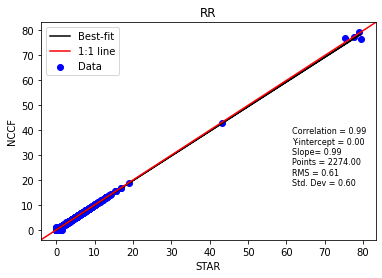

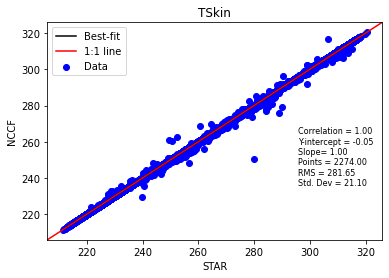

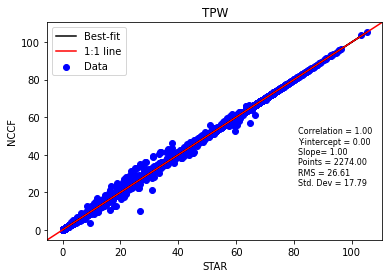

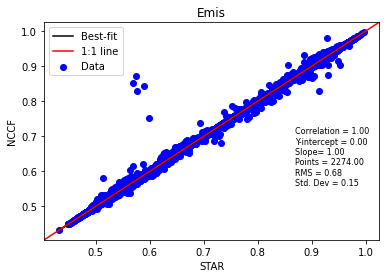

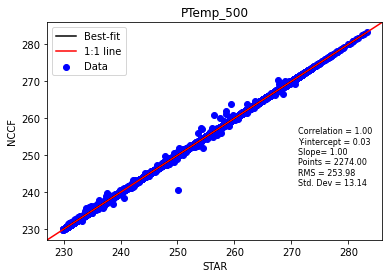

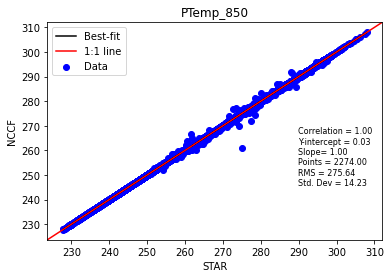

In [195]:
for var_name in img_vars: 
    plotvar(var_name)
for var_name in snd_vars: 
    plotvar(var_name)

In [158]:
len(x)

2274

ValueError: too many values to unpack (expected 2)

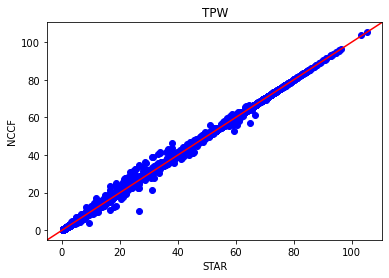

In [66]:
plotvar(var_name)

In [6]:
ds

<xarray.Dataset>
Dimensions:              (Channel: 20, Scanline: 2274, Field_of_view: 90, Qc_dim: 4)
Coordinates:
    Freq                 (Channel) float32 ...
    Latitude             (Scanline, Field_of_view) float32 ...
    Longitude            (Scanline, Field_of_view) float32 ...
Dimensions without coordinates: Channel, Scanline, Field_of_view, Qc_dim
Data variables: (12/50)
    Polo                 (Channel) int16 ...
    ScanTime_year        (Scanline) float32 ...
    ScanTime_doy         (Scanline) timedelta64[ns] ...
    ScanTime_month       (Scanline) float32 ...
    ScanTime_dom         (Scanline) timedelta64[ns] ...
    ScanTime_hour        (Scanline) timedelta64[ns] ...
    ...                   ...
    WindSp               (Scanline, Field_of_view) float32 ...
    WindDir              (Scanline, Field_of_view) float32 ...
    WindU                (Scanline, Field_of_view) float32 ...
    WindV                (Scanline, Field_of_view) float32 ...
    Prob_SF              (Scanline, Field_of_view) float32 ...
    quality_information  |S1 ...
Attributes: (12/54)
    missing_value:                            -999
    notretrievedproduct_value:                -888
    noretrieval_value:                        -99
    cdf_version:                              4.0
    alg_version:                              110621298
    dap_version:                              v11r6
    ...                                       ...
    percentage_optimal_retrievals:            0.4570947
    percentage_suboptimal_retrievals:         0.5428858
    percentage_bad_retrievals:                1.954461e-05
    start_orbit_number:                       17622
    end_orbit_number:                         17623
    id:                                       29cc847af3e3_2022-03-31T12:40:0...